In [6]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, random
random.seed(29)

In [19]:
image_path = "C:/Users/sjcrum/Documents/Data_Science_Capstone/PlantImages/train/Maize/1d21b25f9.png"
img = cv2.imread(image_path)

def random_photo_per_class(path):
    random_images = []
    for root, dirs, files in os.walk(path):
        if root[-5:] != "train":
            image = random.choice(os.listdir("{}".format(root)))
            random_images.append(str(root)+os.sep+str(image))
    return random_images


In [20]:
random_photo_per_class("C:/Users/sjcrum/Documents/Data_Science_Capstone/PlantImages/train")

['C:/Users/sjcrum/Documents/Data_Science_Capstone/PlantImages/train\\Black-grass\\a6f939a8b.png',
 'C:/Users/sjcrum/Documents/Data_Science_Capstone/PlantImages/train\\Charlock\\157ade042-rot-90.png',
 'C:/Users/sjcrum/Documents/Data_Science_Capstone/PlantImages/train\\Cleavers\\502eee444-rot-90vertflip.png',
 'C:/Users/sjcrum/Documents/Data_Science_Capstone/PlantImages/train\\Common Chickweed\\880cabce7-rot-270vertflip.png',
 'C:/Users/sjcrum/Documents/Data_Science_Capstone/PlantImages/train\\Common wheat\\1a5243aa7-rot-180-hflip.png',
 'C:/Users/sjcrum/Documents/Data_Science_Capstone/PlantImages/train\\Fat Hen\\ac88a6662-rot-180vertflip.png',
 'C:/Users/sjcrum/Documents/Data_Science_Capstone/PlantImages/train\\Loose Silky-bent\\9f1e7cc01-rot-90vertflip.png',
 'C:/Users/sjcrum/Documents/Data_Science_Capstone/PlantImages/train\\Maize\\798852825vertflip.png',
 'C:/Users/sjcrum/Documents/Data_Science_Capstone/PlantImages/train\\Scentless Mayweed\\726c2bcb1.png',
 'C:/Users/sjcrum/Document

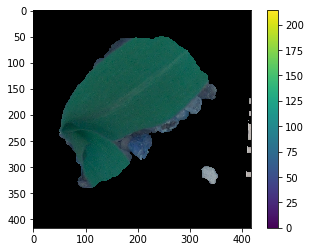

(<matplotlib.image.AxesImage at 0x1cf1cc8f358>,
 None)

In [12]:
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (50,50,450,290)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
image = img*mask2[:,:,np.newaxis]

plt.imshow(image),plt.colorbar(),plt.show()

In [21]:
examples = random_photo_per_class("C:/Users/sjcrum/Documents/Data_Science_Capstone/PlantImages/train")

['C:/Users/sjcrum/Documents/Data_Science_Capstone/PlantImages/train\\Black-grass\\f5ca3d442-rot-180.png', 'C:/Users/sjcrum/Documents/Data_Science_Capstone/PlantImages/train\\Charlock\\7b4d1832b-rot-90.png', 'C:/Users/sjcrum/Documents/Data_Science_Capstone/PlantImages/train\\Cleavers\\a562c2b14-rot-90.png', 'C:/Users/sjcrum/Documents/Data_Science_Capstone/PlantImages/train\\Common Chickweed\\654021d0evertflip.png', 'C:/Users/sjcrum/Documents/Data_Science_Capstone/PlantImages/train\\Common wheat\\79f70b2d7-rot-90.png', 'C:/Users/sjcrum/Documents/Data_Science_Capstone/PlantImages/train\\Fat Hen\\1bcdf1f95-rot-90.png', 'C:/Users/sjcrum/Documents/Data_Science_Capstone/PlantImages/train\\Loose Silky-bent\\e984f580b-rot-180.png', 'C:/Users/sjcrum/Documents/Data_Science_Capstone/PlantImages/train\\Maize\\648ddc558vertflip.png', 'C:/Users/sjcrum/Documents/Data_Science_Capstone/PlantImages/train\\Scentless Mayweed\\a74f659c5-rot-90vertflip.png', 'C:/Users/sjcrum/Documents/Data_Science_Capstone/P

Black-grass
(1005, 1006, 3)
(1005, 1006, 3)


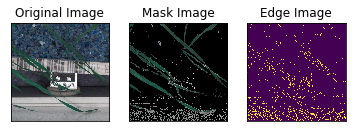

Charlock
(422, 422, 3)
(422, 422, 3)


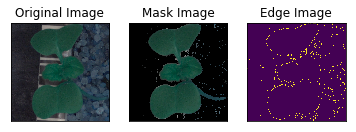

Cleavers
(422, 422, 3)
(422, 422, 3)


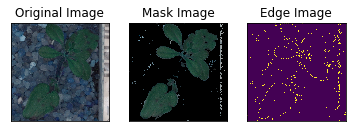

Common Chickweed
(105, 105, 3)
(105, 105, 3)


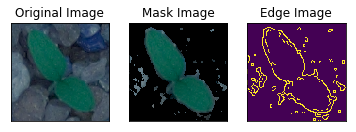

Common wheat
(932, 932, 3)
(932, 932, 3)


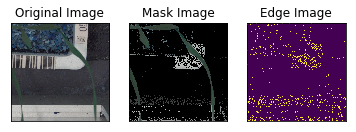

Fat Hen
(201, 201, 3)
(201, 201, 3)


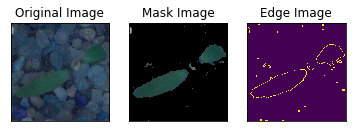

Loose Silky-bent
(97, 97, 3)
(97, 97, 3)


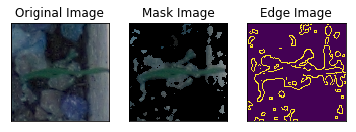

Maize
(365, 365, 3)
(365, 365, 3)


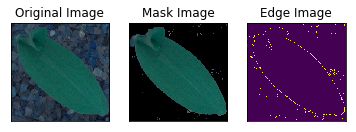

Scentless Mayweed
(82, 82, 3)
(82, 82, 3)


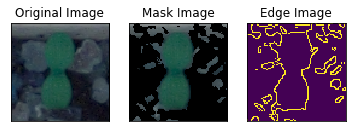

Shepherds Purse
(777, 777, 3)
(777, 777, 3)


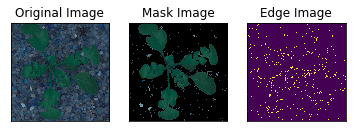

Small-flowered Cranesbill
(575, 575, 3)
(575, 575, 3)


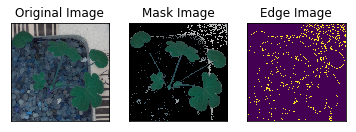

Sugar beet
(522, 522, 3)
(522, 522, 3)


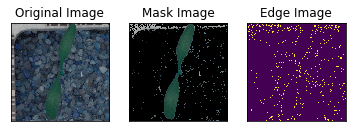

In [27]:
for image in examples:
    directory = os.path.dirname(image)
    species = directory.rsplit('\\', 1)[-1]
    print(species)
    img = cv2.imread(image)
    
    print(img.shape)
    
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, (20, 0, 0), (70, 255,255))

    imask = mask>0
    green = np.zeros_like(img, np.uint8)
    green[imask] = img[imask]
    
    print(green.shape)
    
    edges = cv2.Canny(green,100,150)

    plt.subplot(131),plt.imshow(img)
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(132),plt.imshow(green)
    plt.title('Mask Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(133),plt.imshow(edges)
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

    plt.show()

In [39]:
p = os.path.dirname("C:/Users/sjcrum/Documents/Data Science Capstone/PlantImages/train\\Black-grass\\b024eeb75-rot-180vertflip-hflip.png")
p.rsplit('\\', 1)[-1]

'Black-grass'

Black-grass
(1005, 1006, 3)


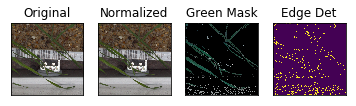

Charlock
(422, 422, 3)


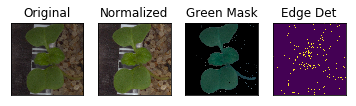

Cleavers
(422, 422, 3)


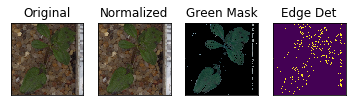

Common Chickweed
(105, 105, 3)


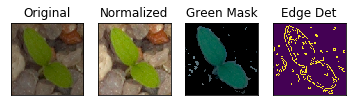

Common wheat
(932, 932, 3)


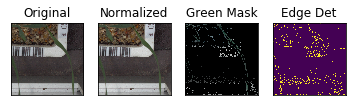

Fat Hen
(201, 201, 3)


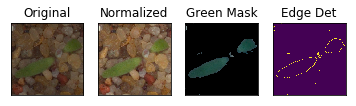

Loose Silky-bent
(97, 97, 3)


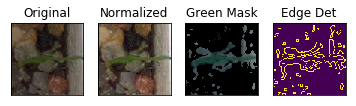

Maize
(365, 365, 3)


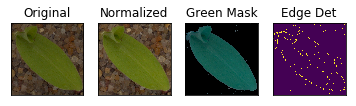

Scentless Mayweed
(82, 82, 3)


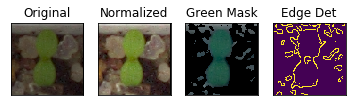

Shepherds Purse
(777, 777, 3)


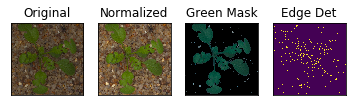

Small-flowered Cranesbill
(575, 575, 3)


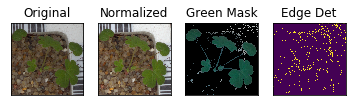

Sugar beet
(522, 522, 3)


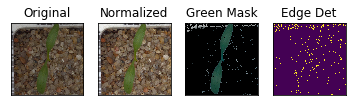

In [28]:
for image in examples:
    directory = os.path.dirname(image)
    species = directory.rsplit('\\', 1)[-1]
    print(species)
    im = cv2.imread(image)
    
    norm_im = cv2.normalize(im, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    print(norm_im.shape)
    RGB_img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    RGB_norm_img = cv2.cvtColor(norm_im, cv2.COLOR_BGR2RGB)
            
    hsv = cv2.cvtColor(norm_im, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, (40, 0, 0), (90, 255,255))
    imask = mask>0
    green = np.zeros_like(im, np.uint8)
    green[imask] = im[imask]
    
    edges = cv2.Canny(green,50,100)

    plt.subplot(141),plt.imshow(RGB_img)
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    plt.subplot(142),plt.imshow(RGB_norm_img)
    plt.title('Normalized'), plt.xticks([]), plt.yticks([])
    plt.subplot(143),plt.imshow(green)
    plt.title('Green Mask'), plt.xticks([]), plt.yticks([])
    plt.subplot(144),plt.imshow(edges)
    plt.title('Edge Det'), plt.xticks([]), plt.yticks([])

    plt.show()

In [88]:
for image in examples:
    directory = os.path.dirname(image)
    species = directory.rsplit('\\', 1)[-1]
    print(species)
    
    im = cv2.imread(image)
    gray_im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    print(cv2.HuMoments(cv2.moments(gray_im)).flatten())
                        

Black-grass
[ 1.65692389e-03  3.18101772e-09  1.33579511e-10  1.51460395e-10
  1.89254138e-20 -4.69527041e-16  1.02934931e-20]
Charlock
[ 2.35552467e-03  7.51273084e-09  4.95311423e-11  1.94080980e-11
  4.23496207e-22 -1.55622473e-17  4.27492598e-22]
Cleavers
[ 2.41131828e-03  6.31360807e-10  6.52233177e-11  4.98928247e-12
  1.59810267e-23  7.17187323e-17 -8.85731692e-23]
Common Chickweed
[ 2.33552359e-03  4.25214037e-09  6.01929353e-11  6.70579426e-12
 -1.10947602e-22  1.12259013e-16  7.64293626e-23]
Common wheat
[2.66452268e-03 5.05120676e-09 3.45911911e-11 1.08996933e-10
 5.59433139e-21 7.32533044e-15 3.67372701e-21]
Fat Hen
[ 2.37439054e-03  1.78578560e-08  4.46974441e-12  2.20047039e-11
  1.69417138e-22  2.68930774e-15 -1.37558014e-22]
Loose Silky-bent
[2.44202715e-03 3.08262745e-09 4.43595120e-11 6.35000502e-12
 6.31865000e-23 1.45727515e-16 8.58233765e-23]
Maize
[1.95714201e-03 3.74749054e-08 2.88460376e-11 2.02975858e-11
 1.99161866e-23 3.89020566e-15 4.90740952e-22]
Scentless 

In [109]:
input_matrix = np.array([[1,4],[1,5],[2,4],[2,5],[3,1],[3,2],[4,1],[4,2]])
for i in range(len(input_matrix)):
    print(i)

0
1
2
3
4
5
6
7
